In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import matplotlib.pyplot as plt
from scipy.stats import poisson
from astropy.io import ascii
#from sklearn.linear_model import LinearRegression
#import seaborn as sns
import pandas as pd
from astropy.table import Table
from astropy.io import fits
from scipy.odr import *
import os
import astropy
import astropy.units as u
from astropy.coordinates import SkyCoord
def match_catalogs(samp_x, samp_y, cat_x, cat_y, max_sep=0.1*u.arcsec):
    if not isinstance(max_sep, astropy.units.quantity.Quantity):
        max_sep = max_sep * u.degree
    sample = SkyCoord(ra=samp_x*u.degree, dec=samp_y*u.degree)
    catalog = SkyCoord(ra=cat_x*u.degree, dec=cat_y*u.degree)
    idx, d2d, d3d = sample.match_to_catalog_sky(catalog)
    samp_sel = d2d < max_sep
    return samp_sel, idx
#import seaborn as sns
from scipy import stats

In [7]:
#hduweb=fits.open('2024PASSAGE/COSMOSWeb_mastercatalog_v1_lephare.fits')
hdu=fits.open('2024PASSAGE/COSMOSWeb_mastercatalog_v1.fits')
#hduweb.info()
hdu[2].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  344 / length of dimension 1                          
NAXIS2  =               784016 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   43 / number of table fields                         
EXTNAME = 'LEPHARE '           / extension name                                 
TTYPE1  = 'zfinal  '                                                            
TFORM1  = 'D       '                                                            
TTYPE2  = 'type    '                                                            
TFORM2  = 'K       '        

In [124]:

file_path_class1 = '2024PASSAGE/Par024lines_reconciled_with_flags.dat'
dftb = pd.read_csv(file_path_class1,header=0, comment='#',sep='\s+')
dftb

,objid,redshift,redshift_error,ra_obj,dec_obj,f140w_mag,a_image_obj,b_image_obj,snr_tot_others,chisq,...,ne3_3869_ratio,ne3_3869_contam,snr_Lya,snr_OII,snr_OIII,snr_Hb,snr_Ha,snr_Pb,snr_SIII,emline_flag
0,8,1.96988,0.00000,150.142174,2.476397,25.52,3.587,2.976,7.33,9.88,...,0.0,0,-1.0,4.067612,8.238994,1.587156,-1.000000e+00,-1.0,-1.0,2
1,9,1.97364,0.00025,150.142183,2.476540,24.11,4.029,2.975,41.54,15.14,...,0.0,0,-1.0,24.607843,52.884615,11.690141,-1.000000e+00,-1.0,-1.0,1
2,31,0.81933,0.00000,150.143154,2.478128,26.57,2.899,2.584,8.65,9.35,...,0.0,0,-1.0,-1.000000,-1.000000,-1.000000,8.640646e+00,-1.0,-1.0,4
3,91,2.11985,0.00115,150.144131,2.480157,24.91,3.009,2.087,10.53,10.20,...,0.0,0,-1.0,3.012912,11.250000,1.484127,-1.000000e+00,-1.0,-1.0,2
4,143,2.13190,0.00000,150.133466,2.481628,24.23,6.425,3.035,9.00,15.09,...,0.0,0,-1.0,8.907035,9.005848,0.035373,-1.000000e+00,-1.0,-1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,3703,1.42841,0.00177,150.126082,2.517314,25.87,3.036,2.688,9.20,14.32,...,0.0,0,-1.0,-1.000000,10.043668,3.591923,2.711538e+00,-1.0,-1.0,2
125,3713,2.28332,0.00099,150.131621,2.517379,24.77,4.382,3.210,4.47,13.08,...,0.0,0,-1.0,5.015674,4.100840,2.139918,-1.000000e+00,-1.0,-1.0,2
126,3721,0.59215,0.00041,150.119086,2.517642,25.10,4.774,2.951,0.00,-5.07,...,0.0,0,-1.0,-1.000000,-1.000000,-1.000000,2.449438e-07,-1.0,-1.0,9
127,3726,2.29374,0.00209,150.127834,2.517718,25.25,4.258,2.594,3.12,10.53,...,0.0,0,-1.0,3.122137,2.246193,0.215859,-1.000000e+00,-1.0,-1.0,4


In [8]:
fits_file_path='2024PASSAGE/Par023_lines_bagpipes_cat_basic_fit.fits'
astropy_table = Table.read(fits_file_path)
df1 = astropy_table.to_pandas()
df1

,passage_id,ra_niriss,dec_niriss,objid,redshift,redshift_error,ra_obj,dec_obj,ID_SE++,COSMOSWEB_ID,...,pa_18756_flux,pa_18756_error,pa_18756_ew_obs,pa_18756_ratio,pa_18756_contam,ne3_3869_flux,ne3_3869_error,ne3_3869_ew_obs,ne3_3869_ratio,ne3_3869_contam
0,8,150.075840,2.528611,b'8',2.18864,0.00000,150.075840,2.528611,435473,15971,...,-1.0,-1.0,-1.0,0.0,0.0,3.200000e-18,1.630000e-18,87.6,0.0,0.0
1,49,150.073086,2.530597,b'49',1.85184,0.00040,150.073086,2.530597,435614,16128,...,-1.0,-1.0,-1.0,0.0,0.0,2.520000e-18,1.640000e-18,11.6,0.0,0.0
2,78,150.072104,2.531603,b'78',1.86167,0.00041,150.072104,2.531603,435698,16223,...,-1.0,-1.0,-1.0,0.0,0.0,1.650000e-17,2.260000e-18,115.0,0.0,0.0
3,92,150.069214,2.532049,b'92',1.42203,0.00047,150.069214,2.532049,435603,16112,...,-1.0,-1.0,-1.0,0.0,0.0,-1.000000e+00,-1.000000e+00,-1.0,0.0,0.0
4,127,150.064970,2.533160,b'127',1.78946,0.00080,150.064970,2.533160,435543,16050,...,-1.0,-1.0,-1.0,0.0,0.0,3.870000e-18,1.290000e-18,18.1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,3958,150.057844,2.568683,b'3958',1.45487,0.00108,150.057844,2.568683,440342,21443,...,-1.0,-1.0,-1.0,0.0,0.0,-1.000000e+00,-1.000000e+00,-1.0,0.0,0.0
151,3986,150.058737,2.569061,b'3986',1.45795,0.00055,150.058737,2.569061,440442,21548,...,-1.0,-1.0,-1.0,0.0,0.0,-1.000000e+00,-1.000000e+00,-1.0,0.0,0.0
152,4083,150.064466,2.570406,b'4083',0.70175,0.00000,150.064466,2.570406,441013,22167,...,-1.0,-1.0,-1.0,0.0,0.0,-1.000000e+00,-1.000000e+00,-1.0,0.0,0.0
153,4097,150.067035,2.570724,b'4097',1.96588,0.00083,150.067035,2.570724,441179,22353,...,-1.0,-1.0,-1.0,0.0,0.0,7.720000e-18,9.710000e-19,118.0,0.0,0.0


In [9]:
hdum=fits.open(fits_file_path)
#hdu.info()
hdum[1].header


XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2822 / length of dimension 1                          
NAXIS2  =                  155 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                  358 / number of table fields                         
TTYPE1  = 'passage_id'                                                          
TFORM1  = 'K       '                                                            
TTYPE2  = 'ra_niriss'                                                           
TFORM2  = 'D       '                                                            
TUNIT2  = 'deg     '        

In [158]:
fits_file_path='2024PASSAGE/Par023_lines_bagpipes_cat_basic_fit.fits'
astropy_table = Table.read(fits_file_path)
df1 = astropy_table.to_pandas()
df1

hdum=fits.open(fits_file_path)

samp_x = np.array(hdum[1].data['ra_obj'])#.data
samp_y = np.array(hdum[1].data['dec_obj'])#.data
cat_x = hdu[1].data['ra      ']#dat['ra      ']#.data
cat_y = hdu[1].data['dec     ']#dat['dec     ']#.data
#print(samp_x)

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
tt[sel_samp] = hdu[1].data['ra      '][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
tt2[sel_samp] = hdu[1].data['dec     '][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
tt3[sel_samp] = hdu[1].data['id      '][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu[1].data['mag_auto_f150w'][idx[sel_samp]]

#tt4 = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
#tt4[sel_samp] = hdu[2].data['zfinal  '][idx[sel_samp]]

tt5 = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
tt5[sel_samp] = hdu[2].data['mass_med'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu[2].data['mass_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu[2].data['mass_u68'][idx[sel_samp]]

df1['cosmosra']=tt
df1['cosmosdec']=tt2
df1['cosmosid']=tt3
df1['cosmosf150mag']=tt4
df1['cosmosmass']=tt5
df1['cosmosmasslow']=tt6
df1['cosmosmassup']=tt7

tt4 = np.ones(shape=(len(np.array(df1['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu[2].data['zfinal  '][idx[sel_samp]]

tt5 = np.ones(shape=(len(np.array(df1['ra_obj'])),)) * (-1)
tt5[sel_samp] = hdu[2].data['zpdf_med'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(df1['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu[2].data['zpdf_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(df1['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu[2].data['zpdf_u68'][idx[sel_samp]]

df1['cosmosz']=tt4
df1['cosmoszmed']=tt5
df1['cosmoszlow']=tt6
df1['cosmoszup']=tt7


file_path_class1 = '2024PASSAGE/Par023lines_reconciled_with_flags.dat'
dftb = pd.read_csv(file_path_class1,header=0, comment='#',sep='\s+')

samp_x = np.array(hdum[1].data['ra_obj'])#.data
samp_y = np.array(hdum[1].data['dec_obj'])#.data
cat_x = np.array(dftb['ra_obj'])#dat['ra      ']#.data
cat_y = np.array(dftb['dec_obj'])#dat['dec     ']#.data

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt7 = np.ones(shape=(len(np.array(df1['ra_obj'])),)) * (-1)
tt7[sel_samp] = dftb['emline_flag'][idx[sel_samp]]
df1['emline_flag']=tt7

df1

,passage_id,ra_niriss,dec_niriss,objid,redshift,redshift_error,ra_obj,dec_obj,ID_SE++,COSMOSWEB_ID,...,cosmosid,cosmosf150mag,cosmosmass,cosmosmasslow,cosmosmassup,cosmosz,cosmoszmed,cosmoszlow,cosmoszup,emline_flag
0,8,150.075840,2.528611,b'8',2.18864,0.00000,150.075840,2.528611,435473,15971,...,-1.0,-1.000000,-1.00000,-1.00000,-1.00000,-1.0000,-1.0000,-1.0000,-1.0000,3.0
1,49,150.073086,2.530597,b'49',1.85184,0.00040,150.073086,2.530597,435614,16128,...,435614.0,23.005245,9.06071,9.00406,9.10000,1.8876,1.8876,1.8630,1.9551,1.0
2,78,150.072104,2.531603,b'78',1.86167,0.00041,150.072104,2.531603,435698,16223,...,435698.0,23.688608,9.34033,9.28414,9.41351,1.9453,1.9453,1.8836,1.9852,1.0
3,92,150.069214,2.532049,b'92',1.42203,0.00047,150.069214,2.532049,435603,16112,...,435603.0,25.747442,8.16716,8.03127,8.24224,1.4136,1.4136,1.2491,1.4910,1.0
4,127,150.064970,2.533160,b'127',1.78946,0.00080,150.064970,2.533160,435543,16050,...,435543.0,23.865559,9.35615,9.30335,9.40000,1.7615,1.7615,1.7398,1.7802,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,3958,150.057844,2.568683,b'3958',1.45487,0.00108,150.057844,2.568683,440342,21443,...,440342.0,24.858160,8.13416,8.08801,8.21637,1.4397,1.4397,1.3886,1.4753,4.0
151,3986,150.058737,2.569061,b'3986',1.45795,0.00055,150.058737,2.569061,440442,21548,...,440442.0,23.744393,9.12723,9.10000,9.19983,1.4719,1.4719,1.4459,1.4821,1.0
152,4083,150.064466,2.570406,b'4083',0.70175,0.00000,150.064466,2.570406,441013,22167,...,441013.0,22.029421,9.68003,9.65000,9.84683,0.6643,0.6643,0.6006,0.6727,4.0
153,4097,150.067035,2.570724,b'4097',1.96588,0.00083,150.067035,2.570724,441179,22353,...,441179.0,24.575468,9.10669,9.05471,9.15000,1.9608,1.9608,1.9025,2.0194,2.0


In [159]:
df1['cosmosf150mag']

0      -1.000000
1      23.005245
2      23.688608
3      25.747442
4      23.865559
         ...    
150    24.858160
151    23.744393
152    22.029421
153    24.575468
154    24.607701
Name: cosmosf150mag, Length: 155, dtype: float64

In [160]:
fits_file_path='2024PASSAGE/Par024_lines_bagpipes_cat_basic_fit.fits'
astropy_table = Table.read(fits_file_path)
df2 = astropy_table.to_pandas()


hdum=fits.open(fits_file_path)

samp_x = np.array(hdum[1].data['ra_obj'])#.data
samp_y = np.array(hdum[1].data['dec_obj'])#.data
cat_x = hdu[1].data['ra      ']#dat['ra      ']#.data
cat_y = hdu[1].data['dec     ']#dat['dec     ']#.data
#print(samp_x)

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
tt[sel_samp] = hdu[1].data['ra      '][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
tt2[sel_samp] = hdu[1].data['dec     '][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
tt3[sel_samp] = hdu[1].data['id      '][idx[sel_samp]]


tt4 = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu[1].data['mag_auto_f150w'][idx[sel_samp]]
#tt4 = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
#tt4[sel_samp] = hdu[2].data['zfinal  '][idx[sel_samp]]

tt5 = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
tt5[sel_samp] = hdu[2].data['mass_med'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu[2].data['mass_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu[2].data['mass_u68'][idx[sel_samp]]

df2['cosmosra']=tt
df2['cosmosdec']=tt2
df2['cosmosid']=tt3
#df1['cosmosz']=tt4
df2['cosmosf150mag']=tt4
df2['cosmosmass']=tt5
df2['cosmosmasslow']=tt6
df2['cosmosmassup']=tt7

tt4 = np.ones(shape=(len(np.array(df2['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu[2].data['zfinal  '][idx[sel_samp]]

tt5 = np.ones(shape=(len(np.array(df2['ra_obj'])),)) * (-1)
tt5[sel_samp] = hdu[2].data['zpdf_med'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(df2['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu[2].data['zpdf_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(df2['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu[2].data['zpdf_u68'][idx[sel_samp]]

df2['cosmosz']=tt4
df2['cosmoszmed']=tt5
df2['cosmoszlow']=tt6
df2['cosmoszup']=tt7

file_path_class1 = '2024PASSAGE/Par024lines_reconciled_with_flags.dat'
dftb = pd.read_csv(file_path_class1,header=0, comment='#',sep='\s+')

samp_x = np.array(hdum[1].data['ra_obj'])#.data
samp_y = np.array(hdum[1].data['dec_obj'])#.data
cat_x = np.array(dftb['ra_obj'])#dat['ra      ']#.data
cat_y = np.array(dftb['dec_obj'])#dat['dec     ']#.data

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt7 = np.ones(shape=(len(np.array(df2['ra_obj'])),)) * (-1)
tt7[sel_samp] = dftb['emline_flag'][idx[sel_samp]]
df2['emline_flag']=tt7

df2

,passage_id,ra_niriss,dec_niriss,objid,redshift,redshift_error,ra_obj,dec_obj,ID_SE++,COSMOSWEB_ID,...,cosmosid,cosmosf150mag,cosmosmass,cosmosmasslow,cosmosmassup,cosmosz,cosmoszmed,cosmoszlow,cosmoszup,emline_flag
0,8,150.142174,2.476397,b'8',1.96988,0.00000,150.142174,2.476397,431674,11714,...,-1.0,-1.000000,-1.00000,-1.00000,-1.00000,-1.0000,-1.0000,-1.0000,-1.0000,2.0
1,9,150.142183,2.476540,b'9',1.97364,0.00025,150.142183,2.476540,431674,11714,...,431674.0,23.769703,8.75321,8.71241,8.80000,1.6867,1.6867,1.6800,1.7000,1.0
2,31,150.143154,2.478128,b'31',0.81933,0.00000,150.143154,2.478128,431943,12016,...,431943.0,26.344396,8.14848,7.95931,8.27749,1.6826,1.6826,1.1410,1.9177,4.0
3,91,150.144131,2.480157,b'91',2.11985,0.00115,150.144131,2.480157,432297,12441,...,432297.0,25.036664,8.15157,8.11444,8.20000,2.3428,2.3428,2.3110,2.3612,2.0
4,100,150.133247,2.480673,b'100',0.87556,0.00038,150.133247,2.480673,431790,11840,...,-1.0,-1.000000,-1.00000,-1.00000,-1.00000,-1.0000,-1.0000,-1.0000,-1.0000,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,3781,150.123709,2.518643,b'3781',1.16926,0.00000,150.123709,2.518643,436499,17133,...,436499.0,25.803876,8.28210,8.20205,8.41424,1.0390,1.0390,0.9299,1.1433,4.0
122,3790,150.124592,2.518832,b'3790',1.16018,0.00035,150.124592,2.518832,436577,17219,...,436577.0,25.915668,7.32602,7.11401,7.56143,1.1571,1.1571,0.1387,1.4362,1.0
123,3808,150.127576,2.518902,b'3808',1.32667,0.00000,150.127576,2.518902,436785,17440,...,436785.0,21.873958,10.63967,10.60000,10.69959,1.1970,1.1970,1.1840,1.3037,1.0
124,3815,150.124832,2.519292,b'3815',1.48305,0.00032,150.124832,2.519292,436670,17319,...,436670.0,24.225683,9.10161,8.98148,9.16684,1.4557,1.4557,1.4500,1.4889,9.0


In [161]:
fits_file_path='2024PASSAGE/Par025_lines_bagpipes_cat_basic_fit.fits'
astropy_table = Table.read(fits_file_path)
df3 = astropy_table.to_pandas()


hdum=fits.open(fits_file_path)

samp_x = np.array(hdum[1].data['ra_obj'])#.data
samp_y = np.array(hdum[1].data['dec_obj'])#.data
cat_x = hdu[1].data['ra      ']#dat['ra      ']#.data
cat_y = hdu[1].data['dec     ']#dat['dec     ']#.data
#print(samp_x)

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
tt[sel_samp] = hdu[1].data['ra      '][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
tt2[sel_samp] = hdu[1].data['dec     '][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
tt3[sel_samp] = hdu[1].data['id      '][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu[1].data['mag_auto_f150w'][idx[sel_samp]]
#tt4 = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
#tt4[sel_samp] = hdu[2].data['zfinal  '][idx[sel_samp]]

tt5 = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
tt5[sel_samp] = hdu[2].data['mass_med'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu[2].data['mass_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu[2].data['mass_u68'][idx[sel_samp]]

df3['cosmosra']=tt
df3['cosmosdec']=tt2
df3['cosmosid']=tt3
#df1['cosmosz']=tt4
df3['cosmosf150mag']=tt4
df3['cosmosmass']=tt5
df3['cosmosmasslow']=tt6
df3['cosmosmassup']=tt7

tt4 = np.ones(shape=(len(np.array(df3['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu[2].data['zfinal  '][idx[sel_samp]]

tt5 = np.ones(shape=(len(np.array(df3['ra_obj'])),)) * (-1)
tt5[sel_samp] = hdu[2].data['zpdf_med'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(df3['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu[2].data['zpdf_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(df3['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu[2].data['zpdf_u68'][idx[sel_samp]]

df3['cosmosz']=tt4
df3['cosmoszmed']=tt5
df3['cosmoszlow']=tt6
df3['cosmoszup']=tt7


file_path_class1 = '2024PASSAGE/Par025lines_reconciled_with_flags.dat'
dftb = pd.read_csv(file_path_class1,header=0, comment='#',sep='\s+')

samp_x = np.array(hdum[1].data['ra_obj'])#.data
samp_y = np.array(hdum[1].data['dec_obj'])#.data
cat_x = np.array(dftb['ra_obj'])#dat['ra      ']#.data
cat_y = np.array(dftb['dec_obj'])#dat['dec     ']#.data

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt7 = np.ones(shape=(len(np.array(df3['ra_obj'])),)) * (-1)
tt7[sel_samp] = dftb['emline_flag'][idx[sel_samp]]
df3['emline_flag']=tt7

In [162]:
fits_file_path='2024PASSAGE/Par026_lines_bagpipes_cat_basic_fit.fits'
astropy_table = Table.read(fits_file_path)
df4 = astropy_table.to_pandas()


hdum=fits.open(fits_file_path)

samp_x = np.array(hdum[1].data['ra_obj'])#.data
samp_y = np.array(hdum[1].data['dec_obj'])#.data
cat_x = hdu[1].data['ra      ']#dat['ra      ']#.data
cat_y = hdu[1].data['dec     ']#dat['dec     ']#.data
#print(samp_x)

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
tt[sel_samp] = hdu[1].data['ra      '][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
tt2[sel_samp] = hdu[1].data['dec     '][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
tt3[sel_samp] = hdu[1].data['id      '][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu[1].data['mag_auto_f150w'][idx[sel_samp]]
#tt4 = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
#tt4[sel_samp] = hdu[2].data['zfinal  '][idx[sel_samp]]

tt5 = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
tt5[sel_samp] = hdu[2].data['mass_med'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu[2].data['mass_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu[2].data['mass_u68'][idx[sel_samp]]

df4['cosmosra']=tt
df4['cosmosdec']=tt2
df4['cosmosid']=tt3
#df1['cosmosz']=tt4
df4['cosmosf150mag']=tt4
df4['cosmosmass']=tt5
df4['cosmosmasslow']=tt6
df4['cosmosmassup']=tt7

tt4 = np.ones(shape=(len(np.array(df4['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu[2].data['zfinal  '][idx[sel_samp]]

tt5 = np.ones(shape=(len(np.array(df4['ra_obj'])),)) * (-1)
tt5[sel_samp] = hdu[2].data['zpdf_med'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(df4['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu[2].data['zpdf_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(df4['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu[2].data['zpdf_u68'][idx[sel_samp]]

df4['cosmosz']=tt4
df4['cosmoszmed']=tt5
df4['cosmoszlow']=tt6
df4['cosmoszup']=tt7

file_path_class1 = '2024PASSAGE/Par026lines_reconciled_with_flags.dat'
dftb = pd.read_csv(file_path_class1,header=0, comment='#',sep='\s+')

samp_x = np.array(hdum[1].data['ra_obj'])#.data
samp_y = np.array(hdum[1].data['dec_obj'])#.data
cat_x = np.array(dftb['ra_obj'])#dat['ra      ']#.data
cat_y = np.array(dftb['dec_obj'])#dat['dec     ']#.data

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt7 = np.ones(shape=(len(np.array(df4['ra_obj'])),)) * (-1)
tt7[sel_samp] = dftb['emline_flag'][idx[sel_samp]]
df4['emline_flag']=tt7

In [163]:
df4['jwst-nircam-f150w_sci']

0      0.031752
1     -0.001887
2      0.718976
3      2.201586
4      3.024083
         ...   
149    6.131744
150    0.226573
151    0.284220
152    0.460396
153    0.606769
Name: jwst-nircam-f150w_sci, Length: 154, dtype: float32

In [164]:
fits_file_path='2024PASSAGE/Par051_lines_bagpipes_cat_basic_fit.fits'
astropy_table = Table.read(fits_file_path)
df5 = astropy_table.to_pandas()


hdum=fits.open(fits_file_path)

samp_x = np.array(hdum[1].data['ra_obj'])#.data
samp_y = np.array(hdum[1].data['dec_obj'])#.data
cat_x = hdu[1].data['ra      ']#dat['ra      ']#.data
cat_y = hdu[1].data['dec     ']#dat['dec     ']#.data
#print(samp_x)

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
tt[sel_samp] = hdu[1].data['ra      '][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
tt2[sel_samp] = hdu[1].data['dec     '][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
tt3[sel_samp] = hdu[1].data['id      '][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu[1].data['mag_auto_f150w'][idx[sel_samp]]
#tt4 = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
#tt4[sel_samp] = hdu[2].data['zfinal  '][idx[sel_samp]]

tt5 = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
tt5[sel_samp] = hdu[2].data['mass_med'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu[2].data['mass_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu[2].data['mass_u68'][idx[sel_samp]]

df5['cosmosra']=tt
df5['cosmosdec']=tt2
df5['cosmosid']=tt3
#df1['cosmosz']=tt4
df5['cosmosf150mag']=tt4
df5['cosmosmass']=tt5
df5['cosmosmasslow']=tt6
df5['cosmosmassup']=tt7

tt4 = np.ones(shape=(len(np.array(df5['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu[2].data['zfinal  '][idx[sel_samp]]

tt5 = np.ones(shape=(len(np.array(df5['ra_obj'])),)) * (-1)
tt5[sel_samp] = hdu[2].data['zpdf_med'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(df5['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu[2].data['zpdf_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(df5['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu[2].data['zpdf_u68'][idx[sel_samp]]

df5['cosmosz']=tt4
df5['cosmoszmed']=tt5
df5['cosmoszlow']=tt6
df5['cosmoszup']=tt7

file_path_class1 = '2024PASSAGE/Par051lines_reconciled_with_flags.dat'
dftb = pd.read_csv(file_path_class1,header=0, comment='#',sep='\s+')

samp_x = np.array(hdum[1].data['ra_obj'])#.data
samp_y = np.array(hdum[1].data['dec_obj'])#.data
cat_x = np.array(dftb['ra_obj'])#dat['ra      ']#.data
cat_y = np.array(dftb['dec_obj'])#dat['dec     ']#.data

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt7 = np.ones(shape=(len(np.array(df5['ra_obj'])),)) * (-1)
tt7[sel_samp] = dftb['emline_flag'][idx[sel_samp]]
df5['emline_flag']=tt7


In [165]:
fits_file_path='2024PASSAGE/Par053_lines_bagpipes_cat_basic_fit.fits'
astropy_table = Table.read(fits_file_path)
df6 = astropy_table.to_pandas()


hdum=fits.open(fits_file_path)

samp_x = np.array(hdum[1].data['ra_obj'])#.data
samp_y = np.array(hdum[1].data['dec_obj'])#.data
cat_x = hdu[1].data['ra      ']#dat['ra      ']#.data
cat_y = hdu[1].data['dec     ']#dat['dec     ']#.data
#print(samp_x)

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
tt[sel_samp] = hdu[1].data['ra      '][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
tt2[sel_samp] = hdu[1].data['dec     '][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
tt3[sel_samp] = hdu[1].data['id      '][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu[1].data['mag_auto_f150w'][idx[sel_samp]]
#tt4 = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
#tt4[sel_samp] = hdu[2].data['zfinal  '][idx[sel_samp]]

tt5 = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
tt5[sel_samp] = hdu[2].data['mass_med'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu[2].data['mass_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(hdum[1].data['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu[2].data['mass_u68'][idx[sel_samp]]

df6['cosmosra']=tt
df6['cosmosdec']=tt2
df6['cosmosid']=tt3
#df1['cosmosz']=tt4
df6['cosmosf150mag']=tt4
df6['cosmosmass']=tt5
df6['cosmosmasslow']=tt6
df6['cosmosmassup']=tt7

tt4 = np.ones(shape=(len(np.array(df6['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu[2].data['zfinal  '][idx[sel_samp]]

tt5 = np.ones(shape=(len(np.array(df6['ra_obj'])),)) * (-1)
tt5[sel_samp] = hdu[2].data['zpdf_med'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(df6['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu[2].data['zpdf_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(df6['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu[2].data['zpdf_u68'][idx[sel_samp]]

df6['cosmosz']=tt4
df6['cosmoszmed']=tt5
df6['cosmoszlow']=tt6
df6['cosmoszup']=tt7


file_path_class1 = '2024PASSAGE/Par053lines_reconciled_with_flags.dat'
dftb = pd.read_csv(file_path_class1,header=0, comment='#',sep='\s+')

samp_x = np.array(hdum[1].data['ra_obj'])#.data
samp_y = np.array(hdum[1].data['dec_obj'])#.data
cat_x = np.array(dftb['ra_obj'])#dat['ra      ']#.data
cat_y = np.array(dftb['dec_obj'])#dat['dec     ']#.data

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt7 = np.ones(shape=(len(np.array(df6['ra_obj'])),)) * (-1)
tt7[sel_samp] = dftb['emline_flag'][idx[sel_samp]]
df6['emline_flag']=tt7

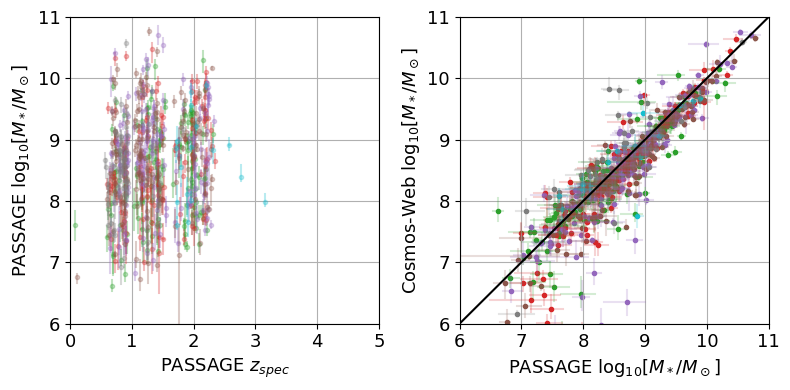

In [132]:
#plt.figure(figsize=(4, 4))
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,4))

filepaths=['2024PASSAGE/Par023_lines_bagpipes_cat_basic_fit.fits','2024PASSAGE/Par024_lines_bagpipes_cat_basic_fit.fits','2024PASSAGE/Par025_lines_bagpipes_cat_basic_fit.fits','2024PASSAGE/Par026_lines_bagpipes_cat_basic_fit.fits','2024PASSAGE/Par051_lines_bagpipes_cat_basic_fit.fits','2024PASSAGE/Par053_lines_bagpipes_cat_basic_fit.fits']
colors=['tab:green','tab:red','tab:purple','tab:brown','tab:gray','tab:cyan']
for hh in range(len(filepaths)):
    m24=fits.open(filepaths[hh])
    z24=m24[1].data['redshift']
    z24err=m24[1].data['redshift_error']
    zmass=m24[1].data['stellar_mass_50']
    zmasslow=m24[1].data['stellar_mass_16']
    zmassup=m24[1].data['stellar_mass_84']
    ax1.plot(z24,zmass,".",color=colors[hh],alpha=0.3)
    ax1.plot([z24,z24],[zmasslow,zmassup],color=colors[hh],alpha=0.3)
    ax1.plot([z24+z24err,z24-z24err],[zmass,zmass],color=colors[hh],alpha=0.3)
ax1.set_xlim(0,5)
ax1.set_ylim(6,11)
ax1.set_xlabel('PASSAGE $z_{spec}$', fontsize=13)
ax1.set_ylabel(r'PASSAGE log$_{10}$[$M_*/M_\odot$]',fontsize=13)
ax1.tick_params(axis='both', labelsize=13)
ax1.grid()






plt.scatter(df1['stellar_mass_50'],df1['cosmosmass'],color='tab:green',marker=".",label='Par023')
plt.plot([df1['stellar_mass_50'],df1['stellar_mass_50']],[df1['cosmosmasslow'],df1['cosmosmassup']],color='tab:green', alpha=0.2)
plt.plot([df1['stellar_mass_16'],df1['stellar_mass_84']],[df1['cosmosmass'],df1['cosmosmass']],color='tab:green', alpha=0.2)
plt.scatter(df2['stellar_mass_50'],df2['cosmosmass'],color='tab:red',marker=".",label='Par024')
plt.plot([df2['stellar_mass_50'],df2['stellar_mass_50']],[df2['cosmosmasslow'],df2['cosmosmassup']],color='tab:red', alpha=0.2)
plt.plot([df2['stellar_mass_16'],df2['stellar_mass_84']],[df2['cosmosmass'],df2['cosmosmass']],color='tab:red', alpha=0.2)
plt.scatter(df3['stellar_mass_50'],df3['cosmosmass'],color='tab:purple',marker=".",label='Par025')
plt.plot([df3['stellar_mass_50'],df3['stellar_mass_50']],[df3['cosmosmasslow'],df3['cosmosmassup']],color='tab:purple', alpha=0.2)
plt.plot([df3['stellar_mass_16'],df3['stellar_mass_84']],[df3['cosmosmass'],df3['cosmosmass']],color='tab:purple', alpha=0.2)
plt.scatter(df4['stellar_mass_50'],df4['cosmosmass'],color='tab:brown',marker=".",label='Par026')
plt.plot([df4['stellar_mass_50'],df4['stellar_mass_50']],[df4['cosmosmasslow'],df4['cosmosmassup']],color='tab:brown', alpha=0.2)
plt.plot([df4['stellar_mass_16'],df4['stellar_mass_84']],[df4['cosmosmass'],df4['cosmosmass']],color='tab:brown', alpha=0.2)
plt.scatter(df5['stellar_mass_50'],df5['cosmosmass'],color='tab:gray',marker=".",label='Par051')
plt.plot([df5['stellar_mass_50'],df5['stellar_mass_50']],[df5['cosmosmasslow'],df5['cosmosmassup']],color='tab:gray', alpha=0.2)
plt.plot([df5['stellar_mass_16'],df5['stellar_mass_84']],[df5['cosmosmass'],df5['cosmosmass']],color='tab:gray', alpha=0.2)
plt.scatter(df6['stellar_mass_50'],df6['cosmosmass'],color='tab:cyan',marker=".",label='Par053')
plt.plot([df6['stellar_mass_50'],df6['stellar_mass_50']],[df6['cosmosmasslow'],df6['cosmosmassup']],color='tab:cyan', alpha=0.2)
plt.plot([df6['stellar_mass_16'],df6['stellar_mass_84']],[df6['cosmosmass'],df6['cosmosmass']],color='tab:cyan', alpha=0.2)

#plt.legend()

#df = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)#, df7, df8, df9, df10
x=np.concatenate((df1['stellar_mass_50'],df2['stellar_mass_50'],df3['stellar_mass_50'],df4['stellar_mass_50'],df5['stellar_mass_50'],df6['stellar_mass_50']))
y=np.concatenate((df1['cosmosmass'],df2['cosmosmass'],df3['cosmosmass'],df4['cosmosmass'],df5['cosmosmass'],df6['cosmosmass']))


data = np.vstack([x, y])
kde = gaussian_kde(data)
xmin, xmax = x.min() - 0.5, x.max() + 0.5
ymin, ymax = y.min() - 0.5, y.max() + 0.5
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
zz = np.reshape(kde(positions).T, xx.shape)
contour_levels = 6 # You can adjust this number or provide a list of specific levels
#plt.contour(xx, yy, zz, levels=contour_levels, colors='k', linewidths=1.5, linestyles='solid')

plt.xlim(6,11)
plt.ylim(6,11)
plt.plot([0,12],[0,12],color="k")
plt.xlabel('PASSAGE log$_{10}$[$M_*/M_\odot$]',fontsize=13)
plt.ylabel('Cosmos-Web log$_{10}$[$M_*/M_\odot$]',fontsize=13)
plt.tick_params(axis='both', labelsize=13)
plt.grid()
plt.tight_layout()

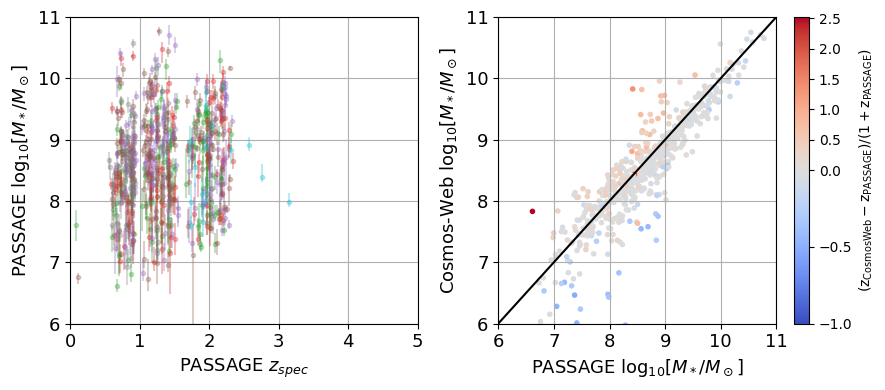

In [151]:
#plt.figure(figsize=(4, 4))
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(9,4))

filepaths=['2024PASSAGE/Par023_lines_bagpipes_cat_basic_fit.fits','2024PASSAGE/Par024_lines_bagpipes_cat_basic_fit.fits','2024PASSAGE/Par025_lines_bagpipes_cat_basic_fit.fits','2024PASSAGE/Par026_lines_bagpipes_cat_basic_fit.fits','2024PASSAGE/Par051_lines_bagpipes_cat_basic_fit.fits','2024PASSAGE/Par053_lines_bagpipes_cat_basic_fit.fits']
colors=['tab:green','tab:red','tab:purple','tab:brown','tab:gray','tab:cyan']
for hh in range(len(filepaths)):
    m24=fits.open(filepaths[hh])
    z24=m24[1].data['redshift']
    z24err=m24[1].data['redshift_error']
    zmass=m24[1].data['stellar_mass_50']
    zmasslow=m24[1].data['stellar_mass_16']
    zmassup=m24[1].data['stellar_mass_84']
    ax1.plot(z24,zmass,".",color=colors[hh],alpha=0.3)
    ax1.plot([z24,z24],[zmasslow,zmassup],color=colors[hh],alpha=0.3)
    ax1.plot([z24+z24err,z24-z24err],[zmass,zmass],color=colors[hh],alpha=0.3)
ax1.set_xlim(0,5)
ax1.set_ylim(6,11)
ax1.set_xlabel('PASSAGE $z_{spec}$', fontsize=13)
ax1.set_ylabel(r'PASSAGE log$_{10}$[$M_*/M_\odot$]',fontsize=13)
ax1.tick_params(axis='both', labelsize=13)
ax1.grid()

'''
reds=[]
masses=[]
fluxes=[]
for hh in range(len(filepaths)):
    m24=fits.open(filepaths[hh])
    z24=m24[1].data['redshift']
    z24err=m24[1].data['redshift_error']
    zmass=m24[1].data['stellar_mass_50']
    zmasslow=m24[1].data['stellar_mass_16']
    zmassup=m24[1].data['stellar_mass_84']
    nirissf150flux=np.log10(np.array(m24[1].data['jwst-nircam-f150w_sci']))
    reds.append(z24)
    masses.append(zmass)
    fluxes.append(nirissf150flux)
from itertools import chain
reds=list(chain.from_iterable(reds))
masses=list(chain.from_iterable(masses))
fluxes=list(chain.from_iterable(fluxes))
'''


#print(fluxes)
#plt.scatter(reds,masses,c=fluxes)
#plt.legend()

#df = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)#, df7, df8, df9, df10
x=np.concatenate((df1['stellar_mass_50'],df2['stellar_mass_50'],df3['stellar_mass_50'],df4['stellar_mass_50'],df5['stellar_mass_50'],df6['stellar_mass_50']))
y=np.concatenate((df1['cosmosmass'],df2['cosmosmass'],df3['cosmosmass'],df4['cosmosmass'],df5['cosmosmass'],df6['cosmosmass']))
dz=np.concatenate(((df1['cosmosz']-df1['redshift'])/(1+df1['redshift']),(df2['cosmosz']-df2['redshift'])/(1+df2['redshift']),(df3['cosmosz']-df3['redshift'])/(1+df3['redshift']),(df4['cosmosz']-df4['redshift'])/(1+df4['redshift']),(df5['cosmosz']-df5['redshift'])/(1+df5['redshift']),(df6['cosmosz']-df6['redshift'])/(1+df6['redshift'])))
x=x[dz>-10]
y=y[dz>-10]
dz=dz[dz>-10]

import matplotlib.colors as mcolors
norm = mcolors.TwoSlopeNorm(vmin=dz.min(), vcenter=0, vmax=dz.max())
sp=plt.scatter(x,y,c=dz,marker=".",cmap='coolwarm',norm=norm)#coolwarm
cbar=fig.colorbar(sp,ax=ax2,label=r'$\rm (z_{CosmosWeb} - z_{PASSAGE})/(1+z_{PASSAGE})$')

data = np.vstack([x, y])
kde = gaussian_kde(data)
xmin, xmax = x.min() - 0.5, x.max() + 0.5
ymin, ymax = y.min() - 0.5, y.max() + 0.5
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
zz = np.reshape(kde(positions).T, xx.shape)
contour_levels = 6 # You can adjust this number or provide a list of specific levels
#plt.contour(xx, yy, zz, levels=contour_levels, colors='k', linewidths=1.5, linestyles='solid')

plt.xlim(6,11)
plt.ylim(6,11)
plt.plot([0,12],[0,12],color="k")
plt.xlabel('PASSAGE log$_{10}$[$M_*/M_\odot$]',fontsize=13)
plt.ylabel('Cosmos-Web log$_{10}$[$M_*/M_\odot$]',fontsize=13)
plt.tick_params(axis='both', labelsize=13)
plt.grid()
plt.tight_layout()

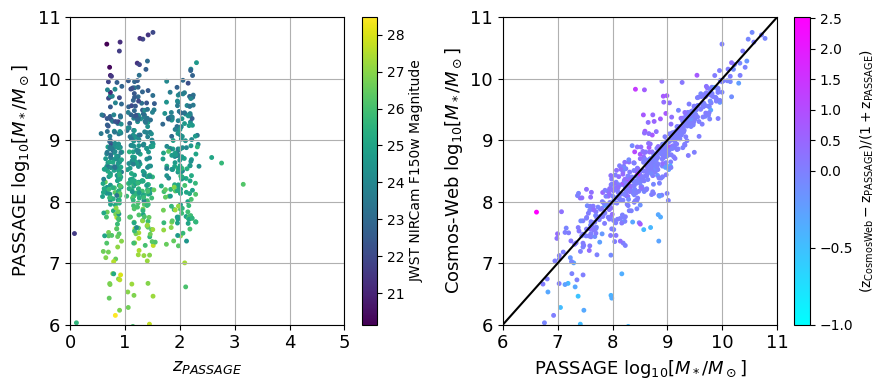

In [183]:
#plt.figure(figsize=(4, 4))
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(9,4))

filepaths=['2024PASSAGE/Par023_lines_bagpipes_cat_basic_fit.fits','2024PASSAGE/Par024_lines_bagpipes_cat_basic_fit.fits','2024PASSAGE/Par025_lines_bagpipes_cat_basic_fit.fits','2024PASSAGE/Par026_lines_bagpipes_cat_basic_fit.fits','2024PASSAGE/Par051_lines_bagpipes_cat_basic_fit.fits','2024PASSAGE/Par053_lines_bagpipes_cat_basic_fit.fits']
colors=['tab:green','tab:red','tab:purple','tab:brown','tab:gray','tab:cyan']
for hh in range(len(filepaths)):
    m24=fits.open(filepaths[hh])
    z24=m24[1].data['redshift']
    z24err=m24[1].data['redshift_error']
    zmass=m24[1].data['stellar_mass_50']
    zmasslow=m24[1].data['stellar_mass_16']
    zmassup=m24[1].data['stellar_mass_84']
    #ax1.plot(z24,zmass,".",color=colors[hh],alpha=0.3)
    #ax1.plot([z24,z24],[zmasslow,zmassup],color=colors[hh],alpha=0.3)
    #ax1.plot([z24+z24err,z24-z24err],[zmass,zmass],color=colors[hh],alpha=0.3)
ax1.set_xlim(0,5)
ax1.set_ylim(6,11)
ax1.set_xlabel('$z_{PASSAGE}$', fontsize=13)
ax1.set_ylabel(r'PASSAGE log$_{10}$[$M_*/M_\odot$]',fontsize=13)
ax1.tick_params(axis='both', labelsize=13)
ax1.grid()


#df4['jwst-nircam-f150w_sci']
#print(fluxes)
#plt.scatter(reds,masses,c=fluxes)
#plt.legend()

#df = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)#, df7, df8, df9, df10
x=np.concatenate((df1['stellar_mass_50'],df2['stellar_mass_50'],df3['stellar_mass_50'],df4['stellar_mass_50'],df5['stellar_mass_50'],df6['stellar_mass_50']))
y=np.concatenate((df1['cosmosmass'],df2['cosmosmass'],df3['cosmosmass'],df4['cosmosmass'],df5['cosmosmass'],df6['cosmosmass']))
dz=np.concatenate(((df1['cosmosz']-df1['redshift'])/(1+df1['redshift']),(df2['cosmosz']-df2['redshift'])/(1+df2['redshift']),(df3['cosmosz']-df3['redshift'])/(1+df3['redshift']),(df4['cosmosz']-df4['redshift'])/(1+df4['redshift']),(df5['cosmosz']-df5['redshift'])/(1+df5['redshift']),(df6['cosmosz']-df6['redshift'])/(1+df6['redshift'])))
#f150=np.concatenate((df1['jwst-nircam-f150w_sci'],df2['jwst-nircam-f150w_sci'],df3['jwst-nircam-f150w_sci'],df4['jwst-nircam-f150w_sci'],df5['jwst-nircam-f150w_sci'],df6['jwst-nircam-f150w_sci']))
zpass=np.concatenate((df1['redshift'],df2['redshift'],df3['redshift'],df4['redshift'],df5['redshift'],df6['redshift']))
f150=np.concatenate((df1['cosmosf150mag'],df2['cosmosf150mag'],df3['cosmosf150mag'],df4['cosmosf150mag'],df5['cosmosf150mag'],df6['cosmosf150mag']))
#print()
x=x[dz>-10]
y=y[dz>-10]
f150=f150[dz>-10]
zpass=zpass[dz>-10]
dz=dz[dz>-10]

from matplotlib.colors import Normalize
norm=Normalize(vmin=np.min(f150[f150>17]),vmax=np.max(f150))
sp1=ax1.scatter(zpass,y,c=f150,s=25,marker=".",cmap='viridis',norm=norm)#coolwarm
fig.colorbar(sp1,ax=ax1,label='JWST NIRCam F150w Magnitude')


import matplotlib.colors as mcolors
norm = mcolors.TwoSlopeNorm(vmin=dz.min(), vcenter=0, vmax=dz.max())
sp=plt.scatter(x,y,c=dz,s=25,marker=".",cmap='cool',norm=norm)#coolwarm
cbar=fig.colorbar(sp,ax=ax2,label=r'$\rm (z_{CosmosWeb} - z_{PASSAGE})/(1+z_{PASSAGE})$')

data = np.vstack([x, y])
kde = gaussian_kde(data)
xmin, xmax = x.min() - 0.5, x.max() + 0.5
ymin, ymax = y.min() - 0.5, y.max() + 0.5
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
zz = np.reshape(kde(positions).T, xx.shape)
contour_levels = 6 # You can adjust this number or provide a list of specific levels
#plt.contour(xx, yy, zz, levels=contour_levels, colors='k', linewidths=1.5, linestyles='solid')

plt.xlim(6,11)
plt.ylim(6,11)
plt.plot([0,12],[0,12],color="k")
plt.xlabel('PASSAGE log$_{10}$[$M_*/M_\odot$]',fontsize=13)
plt.ylabel('Cosmos-Web log$_{10}$[$M_*/M_\odot$]',fontsize=13)
plt.tick_params(axis='both', labelsize=13)
plt.grid()
plt.tight_layout()

np.float64(28.478393229127228)

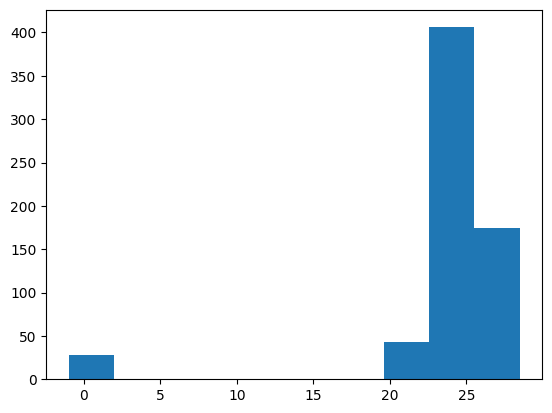

In [171]:
plt.hist(f150)
f2=f150[f150>17]
min(f2)
max(f2)

In [148]:
len(dz)

935

(array([  4.,   1.,   4.,   2.,   2.,   0.,   0.,   0.,   0., 646.]),
 array([-60.36587865, -54.0771311 , -47.78838355, -41.499636  ,
        -35.21088845, -28.9221409 , -22.63339334, -16.34464579,
        -10.05589824,  -3.76715069,   2.52159686]),
 <BarContainer object of 10 artists>)

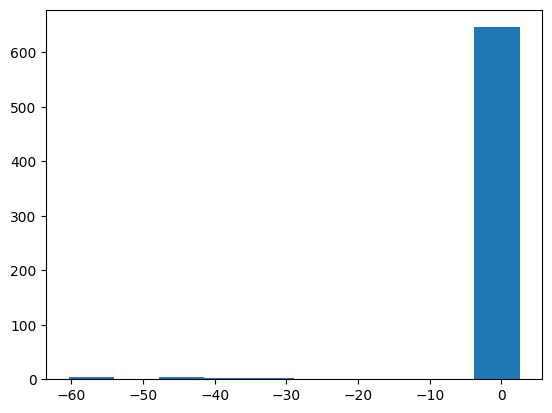

In [143]:
plt.hist(dz)

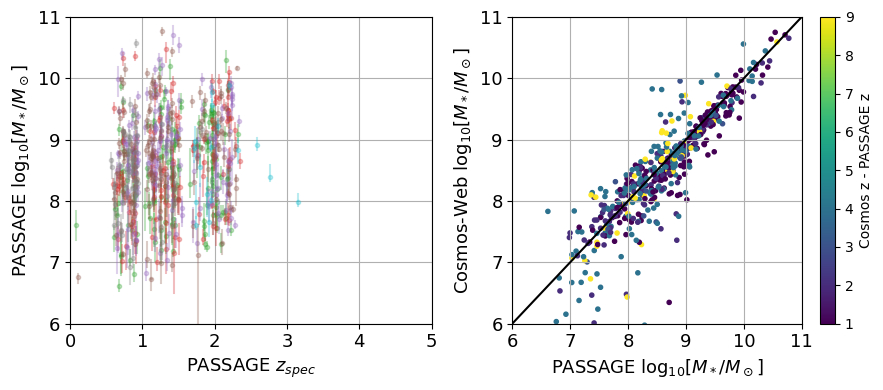

In [140]:
#plt.figure(figsize=(4, 4))
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(9,4))

filepaths=['2024PASSAGE/Par023_lines_bagpipes_cat_basic_fit.fits','2024PASSAGE/Par024_lines_bagpipes_cat_basic_fit.fits','2024PASSAGE/Par025_lines_bagpipes_cat_basic_fit.fits','2024PASSAGE/Par026_lines_bagpipes_cat_basic_fit.fits','2024PASSAGE/Par051_lines_bagpipes_cat_basic_fit.fits','2024PASSAGE/Par053_lines_bagpipes_cat_basic_fit.fits']
colors=['tab:green','tab:red','tab:purple','tab:brown','tab:gray','tab:cyan']
for hh in range(len(filepaths)):
    m24=fits.open(filepaths[hh])
    z24=m24[1].data['redshift']
    z24err=m24[1].data['redshift_error']
    zmass=m24[1].data['stellar_mass_50']
    zmasslow=m24[1].data['stellar_mass_16']
    zmassup=m24[1].data['stellar_mass_84']
    ax1.plot(z24,zmass,".",color=colors[hh],alpha=0.3)
    ax1.plot([z24,z24],[zmasslow,zmassup],color=colors[hh],alpha=0.3)
    ax1.plot([z24+z24err,z24-z24err],[zmass,zmass],color=colors[hh],alpha=0.3)
ax1.set_xlim(0,5)
ax1.set_ylim(6,11)
ax1.set_xlabel('PASSAGE $z_{spec}$', fontsize=13)
ax1.set_ylabel(r'PASSAGE log$_{10}$[$M_*/M_\odot$]',fontsize=13)
ax1.tick_params(axis='both', labelsize=13)
ax1.grid()

'''
reds=[]
masses=[]
fluxes=[]
for hh in range(len(filepaths)):
    m24=fits.open(filepaths[hh])
    z24=m24[1].data['redshift']
    z24err=m24[1].data['redshift_error']
    zmass=m24[1].data['stellar_mass_50']
    zmasslow=m24[1].data['stellar_mass_16']
    zmassup=m24[1].data['stellar_mass_84']
    nirissf150flux=np.log10(np.array(m24[1].data['jwst-nircam-f150w_sci']))
    reds.append(z24)
    masses.append(zmass)
    fluxes.append(nirissf150flux)
from itertools import chain
reds=list(chain.from_iterable(reds))
masses=list(chain.from_iterable(masses))
fluxes=list(chain.from_iterable(fluxes))
'''


#print(fluxes)
#plt.scatter(reds,masses,c=fluxes)
#plt.legend()

#df = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)#, df7, df8, df9, df10
x=np.concatenate((df1['stellar_mass_50'],df2['stellar_mass_50'],df3['stellar_mass_50'],df4['stellar_mass_50'],df5['stellar_mass_50'],df6['stellar_mass_50']))
y=np.concatenate((df1['cosmosmass'],df2['cosmosmass'],df3['cosmosmass'],df4['cosmosmass'],df5['cosmosmass'],df6['cosmosmass']))
dz=np.concatenate((df1['emline_flag'],df2['emline_flag'],df3['emline_flag'],df4['emline_flag'],df5['emline_flag'],df6['emline_flag']))
x=x[dz>-10]
y=y[dz>-10]
dz=dz[dz>-10]

import matplotlib.colors as mcolors
#norm = mcolors.TwoSlopeNorm(vmin=dz.min(), vcenter=0, vmax=dz.max())
sp=plt.scatter(x,y,c=dz,marker=".",cmap='viridis')
cbar=fig.colorbar(sp,ax=ax2,label='Cosmos z - PASSAGE z')

data = np.vstack([x, y])
kde = gaussian_kde(data)
xmin, xmax = x.min() - 0.5, x.max() + 0.5
ymin, ymax = y.min() - 0.5, y.max() + 0.5
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
zz = np.reshape(kde(positions).T, xx.shape)
contour_levels = 6 # You can adjust this number or provide a list of specific levels
#plt.contour(xx, yy, zz, levels=contour_levels, colors='k', linewidths=1.5, linestyles='solid')

plt.xlim(6,11)
plt.ylim(6,11)
plt.plot([0,12],[0,12],color="k")
plt.xlabel('PASSAGE log$_{10}$[$M_*/M_\odot$]',fontsize=13)
plt.ylabel('Cosmos-Web log$_{10}$[$M_*/M_\odot$]',fontsize=13)
plt.tick_params(axis='both', labelsize=13)
plt.grid()
plt.tight_layout()

In [138]:
df6

,passage_id,ra_niriss,dec_niriss,objid,redshift,redshift_error,ra_obj,dec_obj,ID_SE++,COSMOSWEB_ID,...,cosmosdec,cosmosid,cosmosmass,cosmosmasslow,cosmosmassup,cosmosz,cosmoszmed,cosmoszlow,cosmoszup,emline_flag
0,1960,150.117058,1.797834,b'1960',1.73837,0.00000,150.117058,1.797834,310400,24,...,1.797855,310400.0,8.07212,7.97625,8.18964,2.7205,2.7205,2.6678,2.7724,4.0
1,2010,150.116697,1.798277,b'2010',1.95480,0.00026,150.116697,1.798277,310416,40,...,1.798264,310416.0,8.17855,8.10265,8.30494,2.2916,2.2916,2.0790,2.3047,4.0
2,2064,150.120814,1.798953,b'2064',1.95724,0.00000,150.120814,1.798953,310614,253,...,1.798934,310614.0,9.63483,9.55364,9.87709,1.6743,1.6743,1.4191,1.8911,4.0
3,2383,150.120586,1.802690,b'2383',2.04618,0.00102,150.120586,1.802690,310983,676,...,1.802673,310983.0,9.06001,8.89840,9.10946,2.0283,2.0283,1.9839,2.0857,4.0
4,2471,150.119891,1.803909,b'2471',2.20080,0.00000,150.119891,1.803909,311083,796,...,1.803894,311083.0,9.67488,9.52395,9.78813,2.2533,2.2533,2.1512,2.3867,4.0
5,2494,150.103850,1.804341,b'2494',1.89779,0.00000,150.103850,1.804341,310529,161,...,1.804334,310529.0,8.23520,8.03750,8.45487,2.7586,2.7586,2.2510,2.8608,4.0
6,2510,150.111075,1.804657,b'2510',1.95320,0.00124,150.111075,1.804657,310826,499,...,1.804632,310826.0,7.74930,7.57892,7.93541,0.9202,0.9202,0.0446,2.1160,4.0
7,2561,150.108109,1.805409,b'2561',1.79505,0.00000,150.108109,1.805409,310798,469,...,1.805399,310798.0,8.81617,8.70832,8.85000,2.5647,2.5647,2.4462,2.6743,4.0
8,2593,150.100417,1.805920,b'2593',1.91738,0.00000,150.100417,1.805920,310569,204,...,1.805917,310569.0,7.86443,7.66749,7.96442,2.8480,2.8480,2.6413,2.9893,4.0
9,2619,150.117798,1.806238,b'2619',1.73915,0.00096,150.117798,1.806238,311236,969,...,1.806220,311236.0,8.19481,8.01899,8.38194,2.2941,2.2941,0.2840,2.6514,4.0


/tmp/ipykernel_513384/2747941864.py:13: RuntimeWarning: invalid value encountered in log10
  nirissf150flux=np.log10(np.array(m24[1].data['jwst-nircam-f150w_sci']))


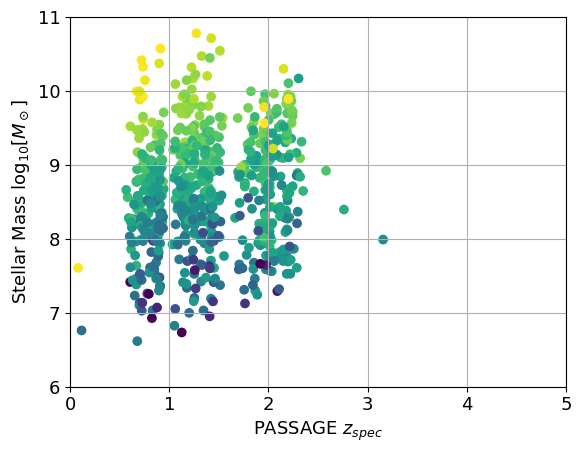

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (6,) + inhomogeneous part.

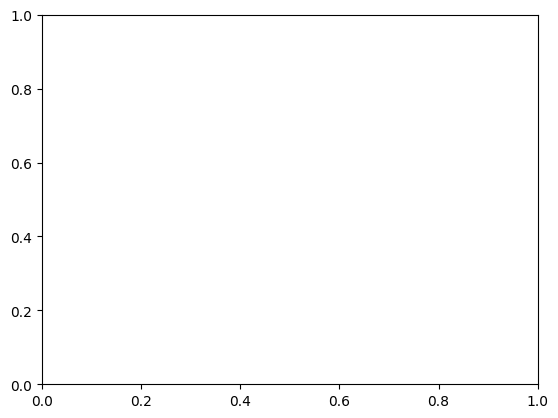

In [71]:
filepaths=['2024PASSAGE/Par023_lines_bagpipes_cat_basic_fit.fits','2024PASSAGE/Par024_lines_bagpipes_cat_basic_fit.fits','2024PASSAGE/Par025_lines_bagpipes_cat_basic_fit.fits','2024PASSAGE/Par026_lines_bagpipes_cat_basic_fit.fits','2024PASSAGE/Par051_lines_bagpipes_cat_basic_fit.fits','2024PASSAGE/Par053_lines_bagpipes_cat_basic_fit.fits']
colors=['tab:green','tab:red','tab:purple','tab:brown','tab:gray','tab:cyan']
reds=[]
masses=[]
fluxes=[]
for hh in range(len(filepaths)):
    m24=fits.open(filepaths[hh])
    z24=m24[1].data['redshift']
    z24err=m24[1].data['redshift_error']
    zmass=m24[1].data['stellar_mass_50']
    zmasslow=m24[1].data['stellar_mass_16']
    zmassup=m24[1].data['stellar_mass_84']
    nirissf150flux=np.log10(np.array(m24[1].data['jwst-nircam-f150w_sci']))
    reds.append(z24)
    masses.append(zmass)
    fluxes.append(nirissf150flux)
    plt.scatter(z24,zmass,c=nirissf150flux)
    #plt.plot(z24,zmass,".",color=colors[hh],alpha=0.3)
    #plt.plot([z24,z24],[zmasslow,zmassup],color=colors[hh],alpha=0.3)
    #plt.plot([z24+z24err,z24-z24err],[zmass,zmass],color=colors[hh],alpha=0.3)
plt.xlim(0,5)
plt.ylim(6,11)
plt.xlabel('PASSAGE $z_{spec}$', fontsize=13)
plt.ylabel(r'Stellar Mass log$_{10}$[$M_\odot$]',fontsize=13)
plt.tick_params(axis='both', labelsize=13)
plt.grid()
plt.show()

import itertools
#reds=list(itertools.chain.from_iterable(reds))
#masses=list(itertools.chain.from_iterable(masses))
#fluxes=list(itertools.chain.from_iterable(fluxes))
plt.scatter(reds,masses,c=fluxes)
plt.xlim(0,5)
plt.ylim(6,11)
plt.xlabel('PASSAGE $z_{spec}$', fontsize=13)
plt.ylabel(r'PASSAGE Stellar Mass log$_{10}$[$M_\odot$]',fontsize=13)
plt.tick_params(axis='both', labelsize=13)
plt.grid()

#filepaths=['Par023_lines_bagpipes_cat_emlines_fit.fits','Par024_lines_bagpipes_cat_emlines_fit.fits','Par025_lines_bagpipes_cat_emlines_fit.fits','Par026_lines_bagpipes_cat_emlines_fit.fits','Par051_lines_bagpipes_cat_emlines_fit.fits','Par053_lines_bagpipes_cat_emlines_fit.fits']


In [73]:
masses

[array([ 9.81498795,  9.57557363,  9.40813072,  8.4749198 ,  9.27537429,
         8.87165362,  8.22461079,  7.81225323,  7.67532048,  6.80869457,
         7.94008848,  8.44598064,  8.97212991,  8.97729142,  9.01411942,
         8.24221758,  6.61352171,  9.5266505 ,  7.19883038,  8.38927841,
         9.09101637,  7.41442368,  7.72045496,  8.96460904,  8.26530194,
         8.51548529,  8.68775704,  8.15391237,  9.08892999,  8.97230584,
         7.53844017,  9.35353414,  7.60527986,  7.9994773 ,  8.35372584,
         7.75605278,  9.41311809,  9.25268961,  8.38068829,  7.77257112,
         8.56740102,  8.76486047,  8.20296228, 10.16794995,  8.06430369,
         9.2896753 ,  9.24530396,  7.52781461,  8.88192068,  8.63174629,
         9.17660414,  8.43011383,  8.17098357,  7.18835629,  7.52367258,
         7.70462142,  7.29810085,  9.42359065,  7.33516983,  7.58999964,
         7.92147395,  8.01938176,  8.81682829,  9.42802867,  7.52535396,
         9.45097541,  7.97071071,  7.96121204,  9.4

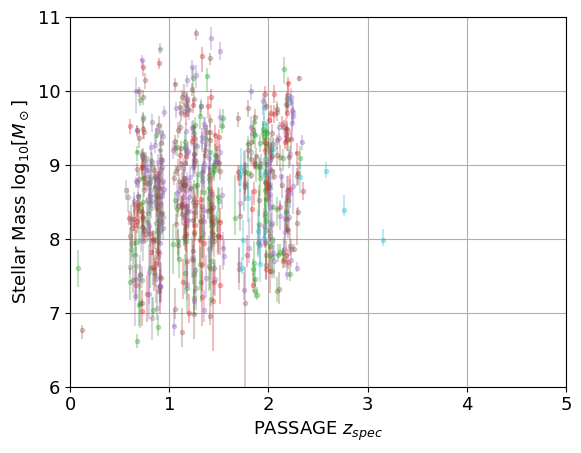

In [74]:
filepaths=['2024PASSAGE/Par023_lines_bagpipes_cat_basic_fit.fits','2024PASSAGE/Par024_lines_bagpipes_cat_basic_fit.fits','2024PASSAGE/Par025_lines_bagpipes_cat_basic_fit.fits','2024PASSAGE/Par026_lines_bagpipes_cat_basic_fit.fits','2024PASSAGE/Par051_lines_bagpipes_cat_basic_fit.fits','2024PASSAGE/Par053_lines_bagpipes_cat_basic_fit.fits']
colors=['tab:green','tab:red','tab:purple','tab:brown','tab:gray','tab:cyan']
for hh in range(len(filepaths)):
    m24=fits.open(filepaths[hh])
    z24=m24[1].data['redshift']
    z24err=m24[1].data['redshift_error']
    zmass=m24[1].data['stellar_mass_50']
    zmasslow=m24[1].data['stellar_mass_16']
    zmassup=m24[1].data['stellar_mass_84']
    plt.plot(z24,zmass,".",color=colors[hh],alpha=0.3)
    plt.plot([z24,z24],[zmasslow,zmassup],color=colors[hh],alpha=0.3)
    plt.plot([z24+z24err,z24-z24err],[zmass,zmass],color=colors[hh],alpha=0.3)
plt.xlim(0,5)
plt.ylim(6,11)
plt.xlabel('PASSAGE $z_{spec}$', fontsize=13)
plt.ylabel(r'Stellar Mass log$_{10}$[$M_\odot$]',fontsize=13)
plt.tick_params(axis='both', labelsize=13)
plt.grid()

In [55]:
np.concatenate((df1['stellar_mass_50'],df2['stellar_mass_50'],df3['stellar_mass_50']))

array([19.1284424 , 18.32320107, 17.22739172, 16.9063328 , 17.68827212,
       18.4201402 , 18.17890849, 15.99935469, 15.04690526, 15.79813713,
       17.7352643 , 16.89727975, 16.35167612, 17.06117192, 17.58800307,
       17.76269025, 13.7653864 , 17.46537981, 16.56315531, 16.45091434,
       17.53321866, 14.67254427, 16.62361186, 17.36899628, 16.04336556,
       17.47275288, 18.04261571, 18.03052239, 16.7858092 , 18.34487835,
       16.25848991, 17.99430443, 16.01369844, 16.53942223, 16.59702032,
       16.43911914, 17.0559793 , 18.31139239, 16.32215949, 16.77840632,
       16.74613957, 18.657335  , 16.65244178, 20.12977518, 17.09682358,
       18.42246669, 18.3672133 , 16.17322232, 17.91274719, 17.1981992 ,
       16.5267558 , 16.48747297, 15.19679483, 16.67363712, 16.84887032,
       18.07608996, 16.13231837, 17.6747692 , 14.90131678, 17.3991258 ,
       15.33335297, 15.82836525, 17.29510291, 18.62158858, 16.21562484,
       18.14124628, 15.66054515, 16.2547273 , 17.55136246, 18.68

In [56]:
df1['stellar_mass_50']

0      19.128442
1      18.323201
2      17.227392
3      16.906333
4      17.688272
         ...    
150          NaN
151          NaN
152          NaN
153          NaN
154          NaN
Name: stellar_mass_50, Length: 155, dtype: float64

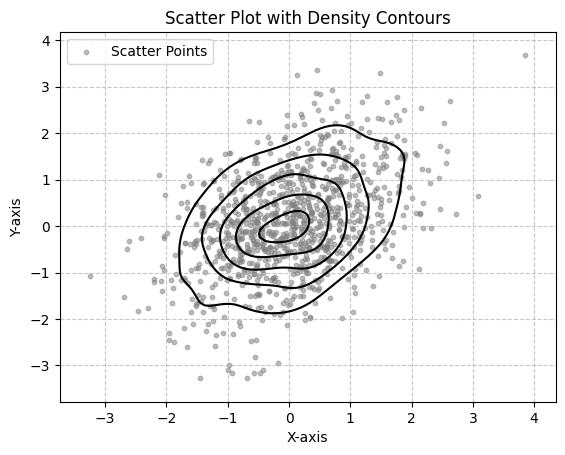

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# 1. Generate some sample data for the scatter plot
np.random.seed(42) # for reproducibility
x = np.random.normal(0, 1, 1000)
y = np.random.normal(0, 1, 1000) + x * 0.5 # introduce some correlation

# 2. Create the scatter plot
fig, ax = plt.subplots()
ax.scatter(x, y, s=10, alpha=0.5, color='gray', label='Scatter Points')

# 3. Perform Kernel Density Estimation (KDE)
# Combine x and y data into a 2D array for KDE
data = np.vstack([x, y])
kde = gaussian_kde(data)
xmin, xmax = x.min() - 0.5, x.max() + 0.5
ymin, ymax = y.min() - 0.5, y.max() + 0.5
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
zz = np.reshape(kde(positions).T, xx.shape)
contour_levels = 5 # You can adjust this number or provide a list of specific levels
ax.contour(xx, yy, zz, levels=contour_levels, colors='k', linewidths=1.5, linestyles='solid')

# 7. Add labels and title for clarity
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Scatter Plot with Density Contours')
ax.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
